# <center>  La fougère de Barnsley

Les Systèmes de Fonctions Itérées (IFS en anglais) permettent de construire des formes fractales en exploitant leur caractère auto-similaire. L'idée est de partir d'un point donné du plan et de lui appliquer les différentes fonctions du système un nombre suffisamment élevé de fois jusqu'à obtenir une configuration limite.

Chaque fonction correspond à une transformation affine du plan, définie à l'aide de matrices de la manière suivante :

$$\begin{pmatrix} x_{n+1} \\ y_{n+1}\end{pmatrix} = \begin{pmatrix} a & b \\ c & d\end{pmatrix}\begin{pmatrix} x_n \\ y_n\end{pmatrix} + \begin{pmatrix} e \\ f\end{pmatrix}$$

Le tout étant de bien choisir les réels $a, b, c, d, e$ et $f$ afin d'obtenir un résultat visuellement satisfaisant.

Les valeurs utilisées ici proviennent du site de Paul Bourke : http://paulbourke.net/fractals/ifs/

Commençons par générer l'image suivante présentée par Michael Barsnsley dans "Fractals Evrywhere"

Afin de raconstituer la fougère de Barnsley, nous allons partir de l'origine du repère $(x_0;y_0=(0;0)$ et utiliser aléatoirement les différentes transformations affines suivantes : 

$f_1 : \begin{pmatrix} x \\ y\end{pmatrix} \mapsto \begin{pmatrix} 0 & 0 \\ 0 & 0,16 \end{pmatrix}\begin{pmatrix} x \\ y\end{pmatrix} + \begin{pmatrix} 0 \\ 0\end{pmatrix}$ appliquée avec une probabilité de $1\%$ qui associe à tout point de l'image, un point sur la tige.

<video controls src="affine_fern_0.mp4" width="320" height="240">animation</video>

Pour cela définissons avec python les matrices utilisées :

In [1]:
from numpy import array # matrice "mathematiques"

A = array([[0, 0],
           [0, 0.16]])

u = array([0,
           0])

 $f_2 : \begin{pmatrix} x \\ y\end{pmatrix} \mapsto \begin{pmatrix} 0,85 & 0,04 \\ -0,04 & 0,85 \end{pmatrix}\begin{pmatrix} x \\ y\end{pmatrix} + \begin{pmatrix} 0 \\ 1,6\end{pmatrix}$ appliquée avec une probabilité de $85\%$ qui associe à tout point d'une branche donnée, un point de la branche supérieure.

<video  width="320" height="240" controls src="affine_fern_1.mp4" >animation</video>

In [2]:
B = array([[0.85, 0.04],
           [-0.04, 0.85]])

v = array([0, 
           1.6])

$f_3 : \begin{pmatrix} x \\ y\end{pmatrix} \mapsto \begin{pmatrix} 0,2 & -0,26 \\ 0,23 & 0,22 \end{pmatrix}\begin{pmatrix} x \\ y\end{pmatrix} + \begin{pmatrix} 0 \\ 1,6\end{pmatrix}$ appliquée avec une probabilité de $7\%$ qui associe à tout point de l'image, un point de la branche inférieure gauche.

<video  width="320" height="240" controls src="affine_fern_2.mp4" >animation</video>

In [3]:
C = array([[.2, -.26],
           [.23, .22]])

w = array([0, 
           1.6])


- $f_4 : \begin{pmatrix} x \\ y\end{pmatrix} \mapsto \begin{pmatrix} -0,15 & 0,28 \\ 0,26 & 0,24 \end{pmatrix}\begin{pmatrix} x \\ y\end{pmatrix} + \begin{pmatrix} 0 \\ 0,44\end{pmatrix}$ appliquée avec une probabilité de $7\%$ qui associe à tout point de l'image, un point de la branche inférieure droite.

<video  width="320" height="240" controls src="affine_fern_3.mp4" >animation</video>

Animations provenant de : https://www.algorithm-archive.org/contents/barnsley/barnsley.html

In [4]:
D = array([[-.15, .28],
           [.26, .24]])

t = array([0, 
           .44])

Maintenant que les différents objets sont définis, il ne nous reste plus qu'à les utiliser pour définir les différentes transformations affines :

In [5]:
from numpy import dot # produit matriciel

matrices = [A, B, C, D]

vecteurs = [u, v, w, t]

def f(i, x ,y ) :
    M = matrices[i]
    v = vecteurs[i]
    X = array([x,y])
    return M.dot(X) + v

In [6]:
from numpy.random import choice
from random import randint
from math import cos, sin, pi
from numpy import full # genere une image remplie de la couleur choisie
from numpy import uint8
from matplotlib.image import imsave # sauvegarde le tableau en tant qu'image

import matplotlib.pyplot as plt

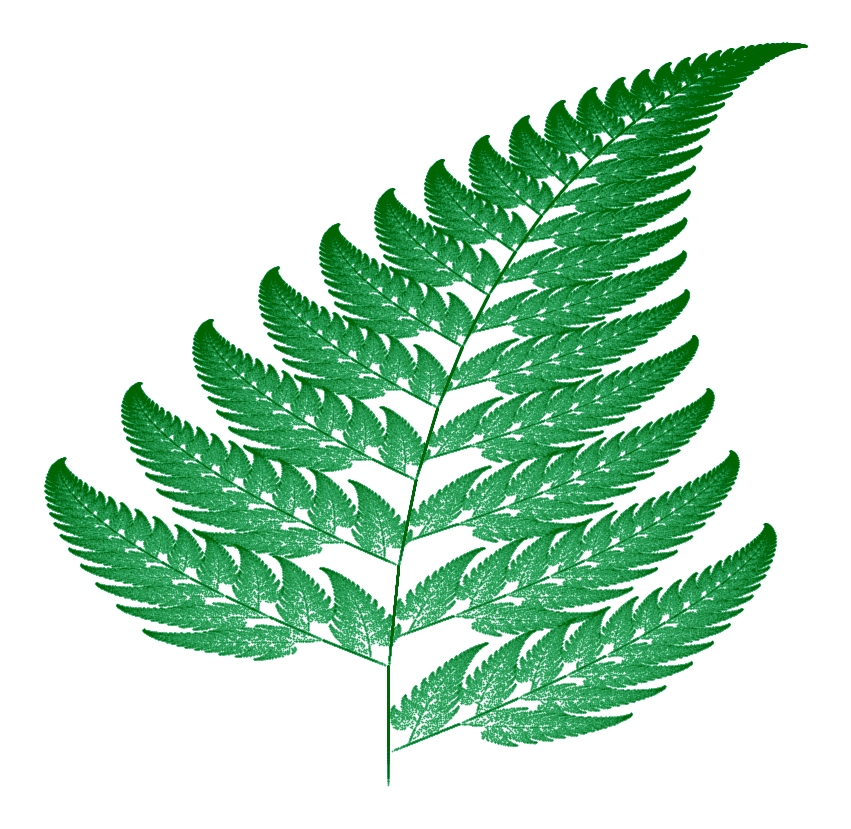

In [25]:
n = 10**6 # nombre d'iterations

x, y = 0, 0 # point de depart
X, Y = [x], [y]

for k in range(n) :
    r = randint(1,100) # entier aleatoire entre 1 et 100
    if r == 1 :
        x, y = f(0, x, y)
    if 1 < r <= 85 :
        x, y = f(1, x, y)
    if 85 < r <= 93 :
        x, y = f(2, x, y)
    if 93 < r <= 100 :
        x, y = f(3, x, y)
    X.append(x)
    Y.append(y)

def image(X,Y) :
    plt.scatter(X, Y, s = .5, edgecolor = 'mediumseagreen')
    plt.scatter(X, Y, s = .001, edgecolor = 'darkgreen')
    plt.axis('off')
    plt.rcParams["figure.figsize"] = (50,50)
    plt.show()
    
image(X,Y)

In [30]:
from ifs_classes import *

X, Y = Feuille(n)
image(X,Y)

IndexError: list index out of range

In [9]:
B.dot(array([.1,.2]))

array([0.093, 0.166])

In [17]:
x,y =f(1,.2,.6)

In [18]:
x

0.194